In [2]:
#核心代码来自微信号gh_30599cd767ee，野生交易员的试炼之路。
import pandas as pd
datename = '180101To220825'
pricefilename = '{}{}{}'.format('data/price_',datename,'.pkl')
premfilename = '{}{}{}'.format('data/prem_',datename,'.pkl')
sizefilename = '{}{}{}'.format('data/size_',datename,'.pkl')
day_returnfilename = '{}{}{}'.format('data/day_return_',datename,'.pkl')
price100filename = '{}{}{}'.format('data/price100_',datename,'.pkl')
prem100filename = '{}{}{}'.format('data/prem100_',datename,'.pkl')
size100filename = '{}{}{}'.format('data/size100_',datename,'.pkl')
priceRankfilename = '{}{}{}'.format('data/priceRank_',datename,'.pkl')
premRankfilename = '{}{}{}'.format('data/premRank_',datename,'.pkl')
sizeRankfilename = '{}{}{}'.format('data/sizeRank_',datename,'.pkl')

pricedf=pd.read_pickle(pricefilename)  #读取收盘价矩阵
premdf=pd.read_pickle(premfilename)    #读取溢价率矩阵。
sizedf=pd.read_pickle(sizefilename)    #读取余额矩阵。
day_return=pd.read_pickle(day_returnfilename)  #读取收益率矩阵
price100df=pd.read_pickle(price100filename)  #读取收盘价百分数矩阵
prem100df=pd.read_pickle(prem100filename)    #读取溢价率百分数矩阵。
size100df=pd.read_pickle(size100filename)    #读取余额百分数矩阵。
priceRankdf=pd.read_pickle(priceRankfilename)  #读取收盘价排名矩阵
premRankdf=pd.read_pickle(premRankfilename)    #读取溢价率排名矩阵。
sizeRankdf=pd.read_pickle(sizeRankfilename)    #读取余额排名矩阵。

<AxesSubplot:xlabel='tradeDate'>

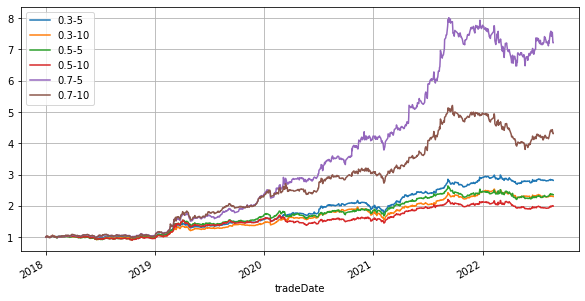

In [3]:
#通过筛选每日最低的N个转债来得到信号矩阵
def selectTopN(tmp):
    tmp=tmp.copy()
    symbols=tmp.nsmallest(N).index
    tmp[:]=0
    tmp[symbols]=1
    return tmp

pnl=pd.DataFrame()
N = 5
for k in [0.3,0.5,0.7]:
    for freq in [5,10]:
        factor=k*premdf+(1-k)*pricedf
        signal=factor.apply(selectTopN,axis=1)
        tmpdf=signal.iloc[range(0,len(signal),freq)]
        week_selected_df=pd.DataFrame(index=signal.index)
        week_selected_df=week_selected_df.join(tmpdf)
        week_selected_df=week_selected_df.fillna(method='pad')
        a=str(k)+"-"+str(freq)
        pnl[a]=(week_selected_df*day_return).sum(axis=1)/N  
(pnl+1).cumprod().plot(figsize=(10,5),grid=True)

<AxesSubplot:xlabel='tradeDate'>

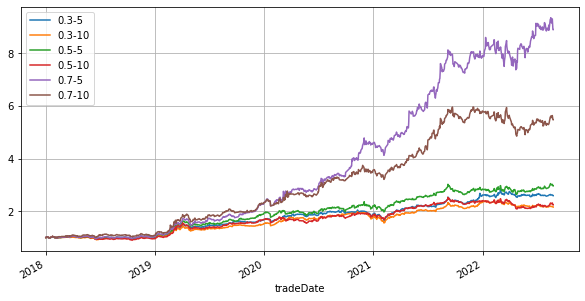

In [4]:
for k in [0.3,0.5,0.7]:
    for freq in [5,10]:
        factor=k*premdf+(1-k)*pricedf+0.1*sizedf
        signal=factor.apply(selectTopN,axis=1)
        tmpdf=signal.iloc[range(0,len(signal),freq)]
        week_selected_df=pd.DataFrame(index=signal.index)
        week_selected_df=week_selected_df.join(tmpdf)
        week_selected_df=week_selected_df.fillna(method='pad')
        a=str(k)+"-"+str(freq)
        pnl[a]=(week_selected_df*day_return).sum(axis=1)/N  
(pnl+1).cumprod().plot(figsize=(10,5),grid=True)

<AxesSubplot:xlabel='tradeDate'>

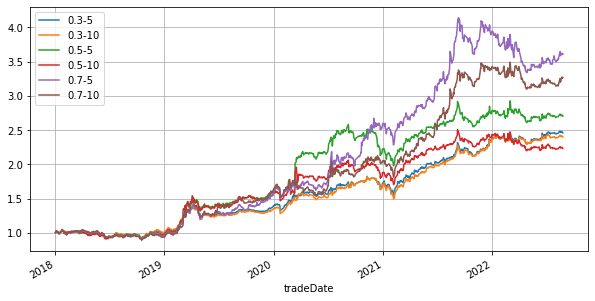

In [8]:
for k in [0.3,0.5,0.7]:
    for freq in [5,10]:
        factor=k*premRankdf+(1-k)*priceRankdf
        signal=factor.apply(selectTopN,axis=1)
        tmpdf=signal.iloc[range(0,len(signal),freq)]
        week_selected_df=pd.DataFrame(index=signal.index)
        week_selected_df=week_selected_df.join(tmpdf)
        week_selected_df=week_selected_df.fillna(method='pad')
        a=str(k)+"-"+str(freq)
        pnl[a]=(week_selected_df*day_return).sum(axis=1)/N  
(pnl+1).cumprod().plot(figsize=(10,5),grid=True)

<AxesSubplot:xlabel='tradeDate'>

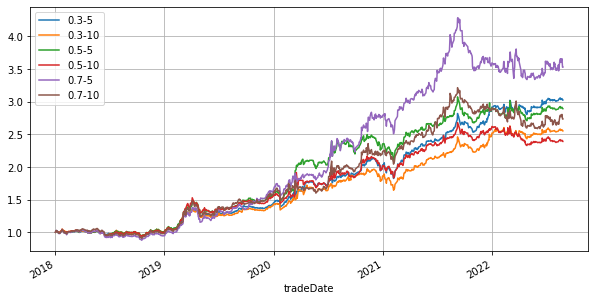

In [9]:
for k in [0.3,0.5,0.7]:
    for freq in [5,10]:
        factor=k*premRankdf+(1-k)*priceRankdf+0.1*sizeRankdf
        signal=factor.apply(selectTopN,axis=1)
        tmpdf=signal.iloc[range(0,len(signal),freq)]
        week_selected_df=pd.DataFrame(index=signal.index)
        week_selected_df=week_selected_df.join(tmpdf)
        week_selected_df=week_selected_df.fillna(method='pad')
        a=str(k)+"-"+str(freq)
        pnl[a]=(week_selected_df*day_return).sum(axis=1)/N  
(pnl+1).cumprod().plot(figsize=(10,5),grid=True)

In [ ]:
pnl=pd.DataFrame()
N = 5
def selectTopN100(tmp):
    tmp=tmp.copy()
    symbols=tmp.nlargest(N).index
    tmp[:]=0
    tmp[symbols]=1
    return tmp

<AxesSubplot:xlabel='tradeDate'>

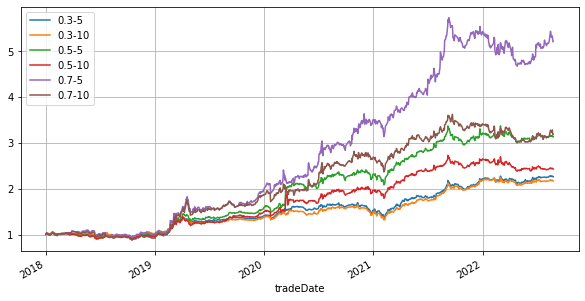

In [5]:
for k in [0.3,0.5,0.7]:
    for freq in [5,10]:
        factor=k*prem100df+(1-k)*price100df
        signal=factor.apply(selectTopN100,axis=1)
        tmpdf=signal.iloc[range(0,len(signal),freq)]
        week_selected_df=pd.DataFrame(index=signal.index)
        week_selected_df=week_selected_df.join(tmpdf)
        week_selected_df=week_selected_df.fillna(method='pad')
        a=str(k)+"-"+str(freq)
        pnl[a]=(week_selected_df*day_return).sum(axis=1)/N  
(pnl+1).cumprod().plot(figsize=(10,5),grid=True)

<AxesSubplot:xlabel='tradeDate'>

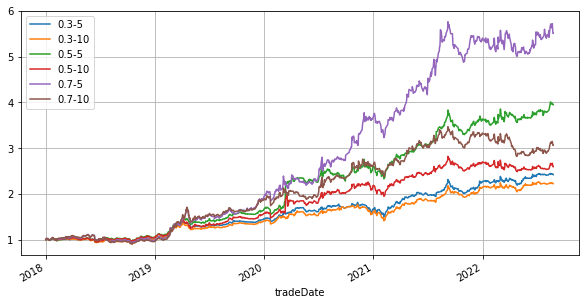

In [7]:
for k in [0.3,0.5,0.7]:
    for freq in [5,10]:
        factor=k*prem100df+(1-k)*price100df+0.1*size100df
        signal=factor.apply(selectTopN100,axis=1)
        tmpdf=signal.iloc[range(0,len(signal),freq)]
        week_selected_df=pd.DataFrame(index=signal.index)
        week_selected_df=week_selected_df.join(tmpdf)
        week_selected_df=week_selected_df.fillna(method='pad')
        a=str(k)+"-"+str(freq)
        pnl[a]=(week_selected_df*day_return).sum(axis=1)/N  
(pnl+1).cumprod().plot(figsize=(10,5),grid=True)